In [1]:
# Notes:

# data downloaded from yahoo finance over past 20 years from Jan 3, 2000 to Apr 3, 2020
# dates are inconsistent because stock market is not open on the weekends

#TODO: 
    #Graph Line Plot and Candlestick of Stock Data
    #Graph each year as own dataframe and compare trends
    #Attempt MACD model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [3]:
dji20 = pd.read_csv('data/^DJI.csv')
dji20

Date          Open          High           Low         Close  \
0     2000-01-03  11501.849609  11522.009766  11305.690430  11357.509766   
1     2000-01-04  11349.750000  11350.059570  10986.450195  10997.929688   
2     2000-01-05  10989.370117  11215.099609  10938.669922  11122.650391   
3     2000-01-06  11113.370117  11313.450195  11098.450195  11253.259766   
4     2000-01-07  11247.059570  11528.139648  11239.919922  11522.559570   
...          ...           ...           ...           ...           ...   
5091  2020-03-30  21678.220703  22378.089844  21522.080078  22327.480469   
5092  2020-03-31  22208.419922  22480.369141  21852.080078  21917.160156   
5093  2020-04-01  21227.380859  21487.240234  20784.429688  20943.509766   
5094  2020-04-02  20819.460938  21477.769531  20735.019531  21413.439453   
5095  2020-04-03  21285.929688  21447.810547  20863.089844  21052.529297   

         Adj Close     Volume  
0     11357.509766  169750000  
1     10997.929688  178420000  
2     11122.650391  203190000  
3     11253.259766  176550000  
4     11522.559570  184900000  
...            ...        ...  
5091  22327.480469  545540000  
5092  21917.160156  571210000  
5093  20943.509766  506680000  
5094  21413.439453  529540000  
5095  21052.529297  450010000  

[5096 rows x 7 columns]

In [4]:
nasdaq20 = pd.read_csv('data/^IXIC.csv')
nasdaq20

Date         Open         High          Low        Close  \
0     2000-01-03  4186.189941  4192.189941  3989.709961  4131.149902   
1     2000-01-04  4020.000000  4073.250000  3898.229980  3901.689941   
2     2000-01-05  3854.350098  3924.209961  3734.870117  3877.540039   
3     2000-01-06  3834.439941  3868.760010  3715.620117  3727.129883   
4     2000-01-07  3711.090088  3882.669922  3711.090088  3882.620117   
...          ...          ...          ...          ...          ...   
5091  2020-03-30  7583.459961  7784.350098  7539.970215  7774.149902   
5092  2020-03-31  7740.060059  7880.310059  7642.859863  7700.100098   
5093  2020-04-01  7459.500000  7566.370117  7301.979980  7360.580078   
5094  2020-04-02  7317.450195  7501.700195  7307.950195  7487.310059   
5095  2020-04-03  7477.270020  7518.720215  7288.109863  7373.080078   

        Adj Close      Volume  
0     4131.149902  1510070000  
1     3901.689941  1511840000  
2     3877.540039  1735670000  
3     3727.129883  1598320000  
4     3882.620117  1634930000  
...           ...         ...  
5091  7774.149902  3846900000  
5092  7700.100098  4059700000  
5093  7360.580078  3685510000  
5094  7487.310059  3608190000  
5095  7373.080078  3279100000  

[5096 rows x 7 columns]

In [5]:
sandp20 = pd.read_csv('data/^GSPC.csv')
sandp20

Date         Open         High          Low        Close  \
0     2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   
1     2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
2     2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
3     2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
4     2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   
...          ...          ...          ...          ...          ...   
5091  2020-03-30  2558.979980  2631.800049  2545.280029  2626.649902   
5092  2020-03-31  2614.689941  2641.389893  2571.149902  2584.590088   
5093  2020-04-01  2498.080078  2522.750000  2447.489990  2470.500000   
5094  2020-04-02  2458.540039  2533.219971  2455.790039  2526.899902   
5095  2020-04-03  2514.919922  2538.179932  2459.959961  2488.649902   

        Adj Close      Volume  
0     1455.219971   931800000  
1     1399.420044  1009000000  
2     1402.109985  1085500000  
3     1403.449951  1092300000  
4     1441.469971  1225200000  
...           ...         ...  
5091  2626.649902  5746220000  
5092  2584.590088  6568290000  
5093  2470.500000  5947900000  
5094  2526.899902  6454990000  
5095  2488.649902  6087190000  

[5096 rows x 7 columns]

In [6]:
dji20.nunique(axis=0)

Date         5096
Open         5064
High         5068
Low          5066
Close        5069
Adj Close    5069
Volume       4706
dtype: int64

In [7]:
dji20.describe()

Open          High           Low         Close     Adj Close  \
count   5096.000000   5096.000000   5096.000000   5096.000000   5096.000000   
mean   14194.793631  14277.854878  14107.844595  14197.127472  14197.127472   
std     5359.291240   5372.620684   5343.809892   5359.429313   5359.429313   
min     6547.009766   6709.609863   6469.950195   6547.049805   6547.049805   
25%    10427.897217  10490.490235  10366.989746  10427.112305  10427.112305   
50%    12162.360351  12247.955078  12084.889649  12166.655274  12166.655274   
75%    17197.681641  17287.158203  17115.642090  17199.080078  17199.080078   
max    29440.470703  29568.570313  29406.750000  29551.419922  29551.419922   

             Volume  
count  5.096000e+03  
mean   2.222190e+08  
std    1.088084e+08  
min    8.410000e+06  
25%    1.453425e+08  
50%    2.159800e+08  
75%    2.743325e+08  
max    2.190810e+09

In [9]:
dji20.shape

(5096, 7)

In [13]:
dji20['Close'].idxmax()
#max close at index 1705
dji20.iloc[5059:5060]
#date max close on 2015-05-19

Date      Open          High       Low         Close  \
5059  2020-02-12  29406.75  29568.570313  29406.75  29551.419922   

         Adj Close     Volume  
5059  29551.419922  309530000

In [14]:
dji20.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

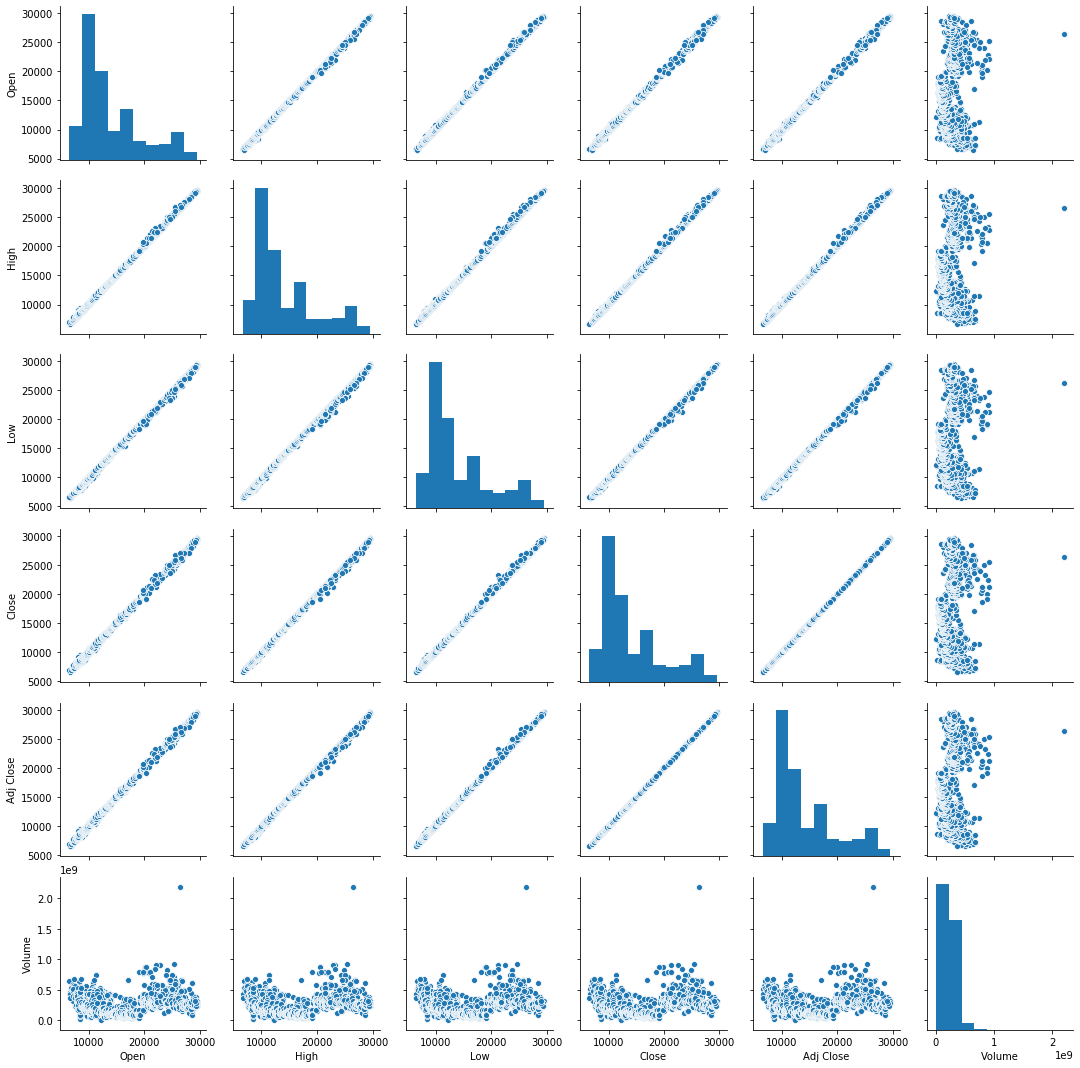

In [15]:
sns.pairplot(dji20)

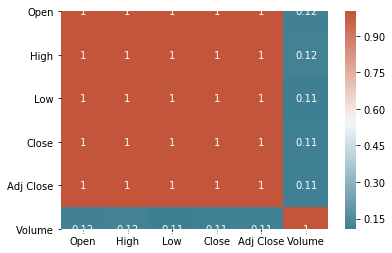

In [16]:
# calculate correlation matrix
corr = dji20.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, annot=True, \
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

Text(0.5, 1.0, 'Close Price Over Time')

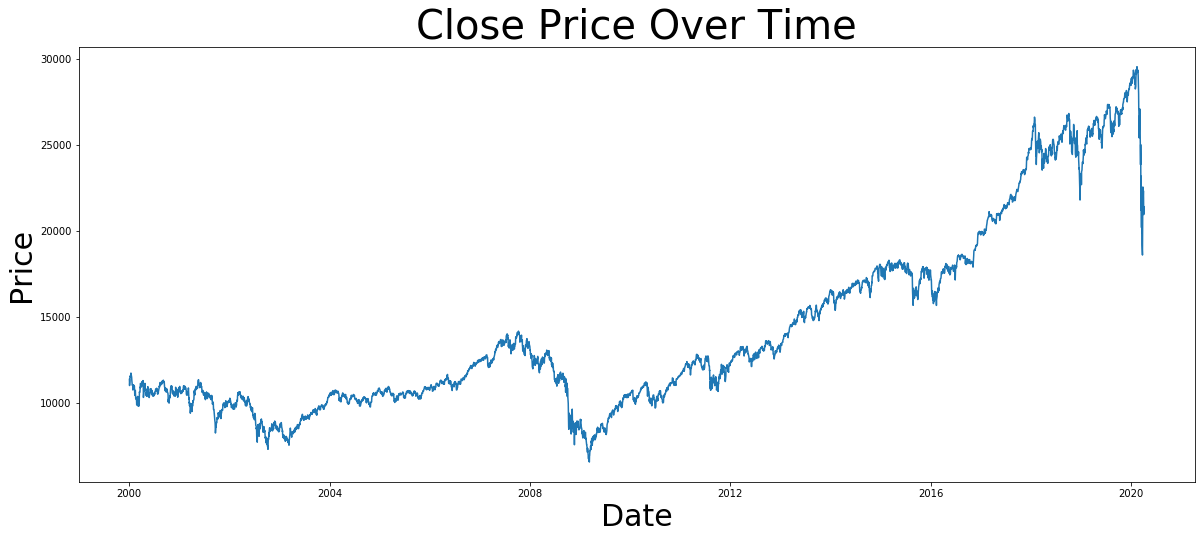

In [69]:
fig, ax = plt.subplots(1, figsize = (20, 8))

dates = dji20['Date_num'].to_list()
ax.plot(dates, dji20['Adj Close'])

ax.set_xlabel('Date', fontsize = 30)
ax.set_ylabel('Price', fontsize = 30)
ax.set_title('Close Price Over Time', fontsize = 40)

In [36]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dji20['Date'],
                open=dji20['Open'],
                high=dji20['High'],
                low=dji20['Low'],
                close=dji20['Adj Close'])])

fig.update_layout(
    title='DJI Candlestick',
    yaxis_title='Price',
    shapes = [dict(
        x0='2000-01-01', x1='2020-04-03', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2010-08-08', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Note Here')]
)

fig.show()

(array([ 396., 1739., 1032.,  327.,  620.,  196.,  175.,  200.,  329.,
          82.]),
 array([ 6547.049805 ,  8847.4868167, 11147.9238284, 13448.3608401,
        15748.7978518, 18049.2348635, 20349.6718752, 22650.1088869,
        24950.5458986, 27250.9829103, 29551.419922 ]),
 <a list of 10 Patch objects>)

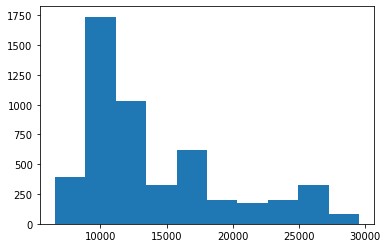

In [38]:
plt.hist(dji20['Adj Close'], bins = 10)

In [62]:
#Copy dji20 df
df = dji20.copy()

#Add Datetime format column

df['Date_num'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

#Add Year, Month, Day column

df['Year'] = df['Date'].apply(lambda x: "".join(x.split("-")[0]))
df['Month'] = df['Date'].apply(lambda x: "".join(x.split("-")[1]))
df['Day'] = df['Date'].apply(lambda x: "".join(x.split("-")[2]))

#Add Close Difference Column
df['Adj Close Change'] = df['Adj Close'].diff()

#Fill starting NaN value with 0
df.fillna(0, inplace = True)

#Add Label column for increase or decrease
df['Label'] = df['Adj Close Change'].apply(lambda x: 1 if x > 0 else 0)

df.head()

Date          Open          High           Low         Close  \
0  2000-01-03  11501.849609  11522.009766  11305.690430  11357.509766   
1  2000-01-04  11349.750000  11350.059570  10986.450195  10997.929688   
2  2000-01-05  10989.370117  11215.099609  10938.669922  11122.650391   
3  2000-01-06  11113.370117  11313.450195  11098.450195  11253.259766   
4  2000-01-07  11247.059570  11528.139648  11239.919922  11522.559570   

      Adj Close     Volume   Date_num  Year Month Day  Adj Close Change  Label  
0  11357.509766  169750000 2000-01-03  2000    01  03          0.000000      0  
1  10997.929688  178420000 2000-01-04  2000    01  04       -359.580078      0  
2  11122.650391  203190000 2000-01-05  2000    01  05        124.720703      1  
3  11253.259766  176550000 2000-01-06  2000    01  06        130.609375      1  
4  11522.559570  184900000 2000-01-07  2000    01  07        269.299804      1

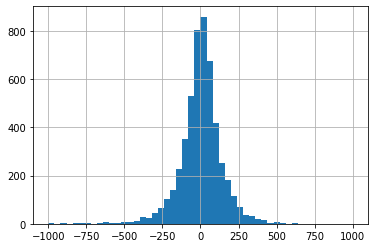

In [59]:
df['Adj Close Change'].hist(bins = 50, range=[-1000, 1000])

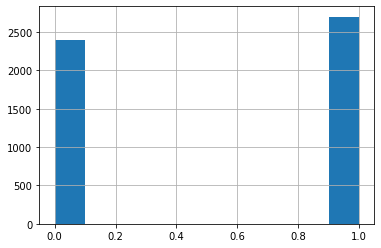

In [76]:
df['Label'].hist(bins = [0,.1, .90, 1])

Text(0, 0.5, 'Adj Close Average')

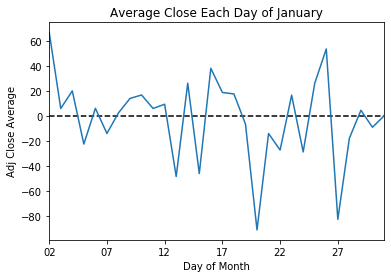

In [91]:
#All January Data from the past 20

Jan = df[df['Month'] == '01'].reset_index(drop=True)

#January Data 
Jan.groupby('Day')['Adj Close Change'].mean().plot()
plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')

plt.title('Average Close Each Day of January')
plt.xlabel('Day of Month')
plt.ylabel('Adj Close Average')


Text(0, 0.5, 'Normalized Change')

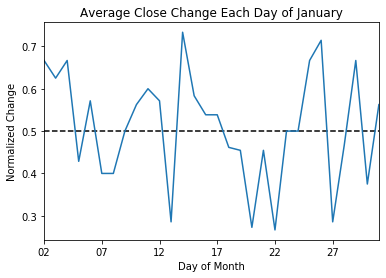

In [94]:
Jan.groupby('Day')['Label'].mean().plot()
plt.hlines(.5, 0, 31, label = "No Change Line", linestyles = 'dashed')

plt.title('Average Close Change Each Day of January')
plt.xlabel('Day of Month')
plt.ylabel('Normalized Change')

In [95]:
Feb = df[df['Month'] == '02'].reset_index(drop=True)
Mar = df[df['Month'] == '03'].reset_index(drop=True)
Apr = df[df['Month'] == '04'].reset_index(drop=True)
May = df[df['Month'] == '05'].reset_index(drop=True)
Jun = df[df['Month'] == '06'].reset_index(drop=True)
Jul = df[df['Month'] == '07'].reset_index(drop=True)
Aug = df[df['Month'] == '08'].reset_index(drop=True)
Sep = df[df['Month'] == '09'].reset_index(drop=True)
Oct = df[df['Month'] == '10'].reset_index(drop=True)
Nov = df[df['Month'] == '11'].reset_index(drop=True)
Dec = df[df['Month'] == '12'].reset_index(drop=True)


In [98]:
print(Jan['Adj Close Change'].mean())

print(Jan['Label'].mean())

-1.165615393442596
0.5128805620608899
